<a href="https://colab.research.google.com/github/Madhavmurari/ML-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Downloading the dataset**

In [2]:
pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np


In [4]:
#Extracting the data from UCI repository
path = 'https://archive.ics.uci.edu/static/public/555/data.csv'
df = pd.read_csv(path,encoding = 'utf8')


<ipython-input-4-30e09caebd67>:3: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,encoding = 'utf8')


In [5]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99826 non-null  object 
 1   category       99826 non-null  object 
 2   title          99826 non-null  object 
 3   body           99826 non-null  object 
 4   amenities      83749 non-null  object 
 5   bathrooms      99760 non-null  object 
 6   bedrooms       99699 non-null  object 
 7   currency       99822 non-null  object 
 8   fee            99823 non-null  object 
 9   has_photo      99823 non-null  object 
 10  pets_allowed   39192 non-null  object 
 11  price          99821 non-null  float64
 12  price_display  99820 non-null  object 
 13  price_type     99823 non-null  object 
 14  square_feet    99823 non-null  object 
 15  address        7946 non-null   object 
 16  cityname       99521 non-null  object 
 17  state          99521 non-null  object 
 18  latitu

#**Checking the missing values in the dataset**

This section checks for missing values in the dataset and calculates their percentages.

In [7]:
df.isnull().sum()

,0
id,0
category,0
title,0
body,0
amenities,16077
bathrooms,66
bedrooms,127
currency,4
fee,3
has_photo,3


In [8]:
# missing value in percentage
df.isnull().mean()*100

,0
id,0.000000
category,0.000000
title,0.000000
body,0.000000
amenities,16.105023
bathrooms,0.066115
bedrooms,0.127221
currency,0.004007
fee,0.003005
has_photo,0.003005


In [9]:
 #Removing the column which has more than 50% missing value and unneccessiry column
 df=df.drop(['id','category','amenities','body','title','currency','address','pets_allowed','has_photo','price_display','price_type','fee'],axis=1)

In [10]:
df.isnull().sum()

,0
bathrooms,66
bedrooms,127
price,5
square_feet,3
cityname,305
state,305
latitude,29
longitude,31
source,6
time,6


In [11]:
df

,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,source,time
0,1,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,1.5,3,1250.0,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,2,3,1395.0,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,1,2,1600.0,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,1,1,975.0,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09
...,...,...,...,...,...,...,...,...,...,...
99821,1.0,1.0,780.0,605,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09
99822,2.0,2.0,813.0,921,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09
99823,1.0,1.0,1325.0,650,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09
99824,1.0,1.0,931.0,701,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09


#**Preprocessing**

This section preprocesses the dataset, including handling categorical features and filtering data.

In [12]:
#counting the number of city
loction_stats = df.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)
loction_stats

,cityname
cityname,
Dallas,2862
Denver,2760
Los Angeles,2434
Las Vegas,1851
Arlington,1577
...,...
Grove,1
Richlands,1
Richmond Hill,1


In [13]:
len(loction_stats[loction_stats<=10])

1979

In [14]:
loction_stats_less_than_10 = loction_stats[loction_stats<=10]
loction_stats_less_than_10

,cityname
cityname,
Clifton Park,10
Southfield,10
Pacific Palisades,10
Cliffwood,10
Kyle,10
...,...
Grove,1
Richlands,1
Richmond Hill,1


In [15]:
len(df.cityname.unique())

2985

In [16]:
df.cityname = df.cityname.apply(lambda x: 'other' if x in loction_stats_less_than_10 else x)
len(df.cityname.unique())

1007

In [17]:
df.shape

(99826, 10)

In [18]:
zero_bed_room=df[df['bedrooms']==0]
print(len(zero_bed_room))


4


In [19]:
# Convert 'bedrooms' column to numeric type
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

# Filter the DataFrame to include only rows where 'bedrooms' is greater than 0
df = df[df['bedrooms'] > 0]

In [20]:
df.shape

(99033, 10)

**Handling Missing Values:**
This section fills missing values with appropriate statistics (mode or mean) and removes rows with essential missing values.


In [21]:
df.isnull().sum()

,0
bathrooms,47
bedrooms,0
price,1
square_feet,0
cityname,300
state,300
latitude,25
longitude,25
source,0
time,0


In [22]:
# Filling missing values in categorical columns with the mode
columns_to_fill = ['bathrooms']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mode().iloc[0])


# Filling missing values in numerical columns with mean
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

<ipython-input-22-85f38650ee09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mode().iloc[0])
<ipython-input-22-85f38650ee09>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'].fillna(df['latitude'].mean(), inplace=True)
<ipython-input-22-85f38650ee09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [23]:
df = df.dropna(subset=['cityname'])
df = df.dropna(subset=['state'])

In [24]:
df.isnull().sum()

,0
bathrooms,0
bedrooms,0
price,1
square_feet,0
cityname,0
state,0
latitude,0
longitude,0
source,0
time,0


In [25]:
df.price.describe()

,price
count,98732.000000
mean,1526.761354
std,889.205085
min,100.000000
25%,1015.000000
50%,1350.000000
75%,1795.000000
max,40000.000000


**Removing the outliers** This section removes outliers from the dataset based on price.

In [26]:
min_t,max_t=df.price.quantile([0.002,0.998])
min_t,max_t

(450.0, 7000.0)

In [27]:
df[df.price<min_t]

,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,source,time
313,1,1.0,386.0,375,other,WI,42.8224,-89.0658,RentLingo,1.577359e+09
666,1,1.0,425.0,656,Johnson City,TN,36.3317,-82.3837,RentLingo,1.577360e+09
787,1,1.0,395.0,572,other,IA,41.0102,-95.2202,RentLingo,1.577360e+09
1009,1,2.0,325.0,325,Toledo,OH,41.6675,-83.5837,RentLingo,1.577359e+09
1410,1,1.0,425.0,975,Port Arthur,TX,29.9142,-93.9383,RentLingo,1.577359e+09
...,...,...,...,...,...,...,...,...,...,...
95602,1,1.0,375.0,400.0,other,AL,33.4390,-86.1009,RentDigs.com,1.544249e+09
95603,1.5,2.0,400.0,500.0,other,AL,33.4390,-86.1009,RentDigs.com,1.544249e+09
95816,1,1.0,390.0,400.0,other,IL,40.4592,-90.6758,RentDigs.com,1.544244e+09
97180,2,2.0,402.0,870.0,Milton,FL,30.6696,-87.1549,RentDigs.com,1.544196e+09


In [28]:
df[df.price>max_t]

,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,source,time
13,3.5,4.0,7800.0,4650,Scottsdale,AZ,33.5783,-111.8902,RentLingo,1.577360e+09
152,3.5,4.0,8500.0,2613,other,HI,21.3991,-157.7452,RentLingo,1.577360e+09
477,7,7.0,9000.0,4355,Bloomington,IN,39.1471,-86.5136,RentLingo,1.577360e+09
537,2,2.0,11000.0,1322,Coronado,CA,32.6596,-117.1595,RentLingo,1.577360e+09
575,2,5.0,7400.0,1170,San Francisco,CA,37.7599,-122.4379,RentLingo,1.577360e+09
...,...,...,...,...,...,...,...,...,...,...
95578,5,4.0,19500.0,4380.0,San Francisco,CA,37.7740,-122.4104,RentDigs.com,1.544251e+09
96108,6,5.0,11500.0,8643.0,Bedford,NY,41.1852,-73.6409,RentDigs.com,1.544203e+09
96260,2,2.0,11250.0,2269.0,New York,NY,40.7247,-73.9545,RentDigs.com,1.544175e+09
97263,2,3.0,8250.0,800.0,New York,NY,40.7397,-74.0008,RentDigs.com,1.544180e+09


In [29]:
df=df[(df.price>min_t)&(df.price<max_t)]
df

,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,source,time
0,1,1.0,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,1.5,3.0,1250.0,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,2,3.0,1395.0,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,1,2.0,1600.0,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,1,1.0,975.0,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09
...,...,...,...,...,...,...,...,...,...,...
99821,1.0,1.0,780.0,605,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09
99822,2.0,2.0,813.0,921,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09
99823,1.0,1.0,1325.0,650,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09
99824,1.0,1.0,931.0,701,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09


In [30]:
#Remove the categorical data by one hot incoding
city=pd.get_dummies(df['cityname'],drop_first=True)
sta=pd.get_dummies(df['state'],drop_first=True)
sou=pd.get_dummies(df['source'],drop_first=True)

In [31]:
df=df.drop(['cityname','state','source'],axis=1)

In [32]:
df

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
0,1,1.0,2195.0,542,33.8520,-118.3759,1.577360e+09
1,1.5,3.0,1250.0,1500,37.0867,-76.4941,1.577360e+09
2,2,3.0,1395.0,1650,35.8230,-78.6438,1.577360e+09
3,1,2.0,1600.0,820,38.3622,-121.9712,1.577360e+09
4,1,1.0,975.0,624,35.1038,-106.6110,1.577360e+09
...,...,...,...,...,...,...,...
99821,1.0,1.0,780.0,605,29.6151,-95.1998,1.544186e+09
99822,2.0,2.0,813.0,921,30.2254,-81.7579,1.544186e+09
99823,1.0,1.0,1325.0,650,32.7379,-117.0914,1.544186e+09
99824,1.0,1.0,931.0,701,35.4158,-80.8451,1.544186e+09


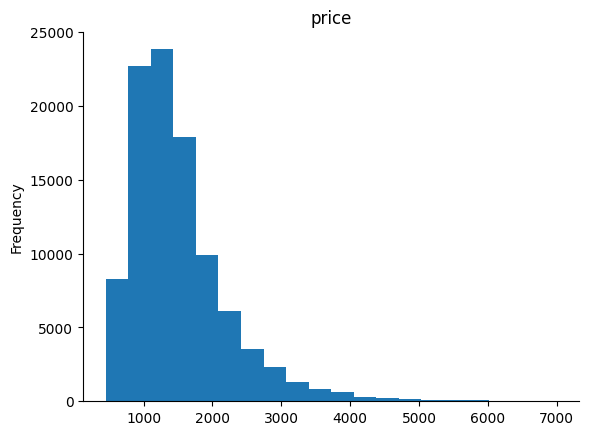

In [33]:
from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
city

,Abingdon,Abington,Absecon,Acton,Addison,Akron,Albuquerque,Alexandria,Alhambra,Allen,...,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99822,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99823,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99824,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
sta

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
99822,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
99823,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99824,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
sou

,Apartable,BostonApartments,Claz,GoSection8,Home Rentals,HousesForRent,Listanza,ListedBuy,Nest Seekers,RENTCaf,...,RealRentals,RentDigs.com,RentFeeder,RentLingo,Seattle Rentals,SpreadMyAd,Z57,rentbits,tenantcloud,vFlyer
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
99822,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
99823,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
99824,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [37]:
df=pd.concat([df,city,sta,sou],axis=1)

In [38]:
df.shape

(98299, 1085)

**Splitting the Dataset and Normalizing Features**

In [39]:
#spliting the dataset independent and dependent variable
X = df.drop('price',axis=1)
y = df['price']

In [40]:
#normalization of time
from sklearn.preprocessing import MinMaxScaler

column_to_normalize = X['time'].values.reshape(-1, 1)

scaler = MinMaxScaler()

normalized_column = scaler.fit_transform(column_to_normalize)

X['time'] = normalized_column


In [41]:
X

,bathrooms,bedrooms,square_feet,latitude,longitude,time,Abingdon,Abington,Absecon,Acton,...,RealRentals,RentDigs.com,RentFeeder,RentLingo,Seattle Rentals,SpreadMyAd,Z57,rentbits,tenantcloud,vFlyer
0,1,1.0,542,33.8520,-118.3759,0.999065,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1.5,3.0,1500,37.0867,-76.4941,0.999064,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,3.0,1650,35.8230,-78.6438,0.999064,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,1,2.0,820,38.3622,-121.9712,0.999064,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,1.0,624,35.1038,-106.6110,0.999063,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,1.0,1.0,605,29.6151,-95.1998,0.000342,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
99822,2.0,2.0,921,30.2254,-81.7579,0.000341,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
99823,1.0,1.0,650,32.7379,-117.0914,0.000341,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
99824,1.0,1.0,701,35.4158,-80.8451,0.000339,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

In [43]:
#Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [44]:
# Fit linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Make predictions on test set
y_pred = model.predict(X_test)

In [46]:
model.score(X_test,y_test)

0.7201027609706416

#**Evaluate the model**

This section evaluates the performance of the model using Mean Squared Error (MSE) and R-squared score.

In [47]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 140088.586348835
R-squared Score: 0.7201027609706416
